In [57]:
import matplotlib.pyplot as plt
import pylab as py
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.stats as sm_stats
import statsmodels.stats.api as sms
import scipy.stats as stats

In [60]:
file = "dataset/other_train.csv"
medical_data = pd.read_csv(file)

file = "dataset/personal_train.csv"
personal_data = pd.read_csv(file)

pd.set_option("display.max_columns", None) # pd.reset_option("max_columns")
medical_data.head()

,Unnamed: 0,name,address,kurtosis_oxygen,pregnant,education-num,relationship,skewness_glucose,mean_glucose,std_oxygen,capital-gain,skewness_oxygen,kurtosis_glucose,personal_info,education,fnlwgt,class,std_glucose,income,mean_oxygen,hours-per-week,capital-loss
0,0,Christian Gustafson,"67834 Kim Plaza Suite 620\r\nNew Desiree, KS 8...",6.123066,f,13.0,Not-in-family,-0.015362,141.187500,29.136418,0.0,38.011933,-0.139766,Prof-specialty|United-States\r\r\nNever-marrie...,Bachelors,196912.0,0.0,47.682339,<=50K,5.114548,40.0,0.0
1,1,Charles Gillespie,62025 Michael Turnpike\r\nSouth Stephaniemouth...,9.839099,f,9.0,Husband,0.672588,120.718750,16.569199,0.0,111.269661,0.257893,Other-service|United-States\r\r\nMarried-civ-s...,HS-grad,230136.0,0.0,43.125713,>50K,2.163880,60.0,0.0
2,2,Milton Dube,91113 Pierce Pass Suite 424\r\nPort Alejandrab...,0.237147,f,10.0,Own-child,16.544542,34.640625,65.976393,0.0,-0.338388,3.799229,Sales|United-States\r\r\nNever-married -- Priv...,Some-college,165505.0,1.0,34.898230,<=50K,88.933946,20.0,0.0
3,3,Roy Paradis,"01168 Stark Pine Apt. 583\r\nDavidville, IN 32044",9.420978,f,5.0,Not-in-family,-0.877518,136.148438,13.897067,0.0,123.388400,-0.053924,Handlers-cleaners|United-States\r\r\nDivorced ...,9th,215150.0,0.0,61.442566,<=50K,2.379599,50.0,0.0
4,4,Jonathan Spears,698 Cody Prairie Suite 415\r\nPort Jenniferche...,1.395169,f,4.0,Own-child,20.564579,34.914062,60.871138,0.0,1.019152,4.429704,?|United-States\r\r\nDivorced -- ?|White,7th-8th,200819.0,1.0,36.730868,<=50K,74.640468,84.0,0.0


In [59]:
# basic info about dataset
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3983 entries, 0 to 3982
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        3983 non-null   int64  
 1   name              3983 non-null   object 
 2   address           3983 non-null   object 
 3   kurtosis_oxygen   3974 non-null   float64
 4   pregnant          3971 non-null   object 
 5   education-num     3579 non-null   float64
 6   relationship      3961 non-null   object 
 7   skewness_glucose  3965 non-null   float64
 8   mean_glucose      3963 non-null   float64
 9   std_oxygen        3967 non-null   float64
 10  capital-gain      3969 non-null   float64
 11  skewness_oxygen   3975 non-null   float64
 12  kurtosis_glucose  3968 non-null   float64
 13  personal_info     3974 non-null   object 
 14  education         3971 non-null   object 
 15  fnlwgt            3967 non-null   float64
 16  class             3962 non-null   float64


In [48]:
personal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3933 entries, 0 to 3932
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     3933 non-null   int64 
 1   name           3933 non-null   object
 2   address        3933 non-null   object
 3   age            3933 non-null   int64 
 4   sex            3933 non-null   object
 5   date_of_birth  3933 non-null   object
dtypes: int64(2), object(4)
memory usage: 123.0+ KB


In [73]:
# mean, median, standard deviation ...
medical_data.describe()

,Unnamed: 0,kurtosis_oxygen,education-num,skewness_glucose,mean_glucose,std_oxygen,capital-gain,skewness_oxygen,kurtosis_glucose,fnlwgt,class,std_glucose,mean_oxygen,hours-per-week,capital-loss
count,3983.00000,3974.000000,3579.000000,3965.000000,3963.000000,3967.000000,3969.000000,3975.000000,3968.000000,3967.000000,3962.000000,3968.000000,3971.000000,3970.000000,3970.000000
mean,1991.00000,7.416322,12.547080,4.199644,101.295505,31.109754,1001.580751,91.371858,0.949064,189412.756995,0.254922,45.176099,18.421711,40.306549,85.335264
std,1149.93739,4.803833,322.343903,9.663219,33.546001,22.228906,6799.385942,108.339309,1.608717,102953.580337,0.435872,7.596572,34.713003,12.349879,402.217959
min,0.00000,-2.597872,-1600.000000,-1.755332,6.187500,7.370432,0.000000,-1.976976,-1.641515,19214.000000,0.000000,25.695250,0.213211,1.000000,0.000000
25%,995.50000,3.667526,9.000000,-0.119347,87.757812,15.032694,0.000000,13.074440,0.071484,117833.000000,0.000000,40.183354,2.067308,40.000000,0.000000
50%,1991.00000,7.780968,10.000000,0.371808,110.664062,20.554648,0.000000,68.629714,0.310279,180869.000000,0.000000,45.888203,3.237458,40.000000,0.000000
75%,2986.50000,10.260954,13.000000,2.078418,124.140625,43.052135,0.000000,126.954629,0.775953,235405.000000,1.000000,50.357111,12.604515,45.000000,0.000000
max,3982.00000,34.539844,1600.000000,68.101622,189.734375,110.642211,99999.000000,1191.000837,8.069522,755858.000000,1.000000,91.206475,217.371238,99.000000,4356.000000


In [50]:
# mode
print(stats.mode(medical_data["mean_glucose"]))
print(stats.mode(medical_data["mean_oxygen"]))

print(stats.mode(medical_data["kurtosis_glucose"]))
print(stats.mode(medical_data["kurtosis_oxygen"]))

print(stats.mode(medical_data["skewness_glucose"]))
print(stats.mode(medical_data["skewness_oxygen"]))

ModeResult(mode=array([87.03125]), count=array([4]))
ModeResult(mode=array([2.1187291]), count=array([5]))


In [51]:
# variance
print(np.var(medical_data["mean_glucose"]))
print(np.var(medical_data["mean_oxygen"]))

print(np.var(medical_data["kurtosis_glucose"]))
print(np.var(medical_data["kurtosis_oxygen"]))

print(np.var(medical_data["skewness_glucose"]))
print(np.var(medical_data["skewness_oxygen"]))

1125.0502299640254
1204.6891359283454


<AxesSubplot:xlabel='mean_glucose'>

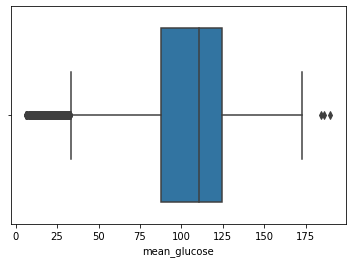

In [67]:
sns.boxplot(data = medical_data, x = "mean_glucose")

<AxesSubplot:xlabel='mean_oxygen'>

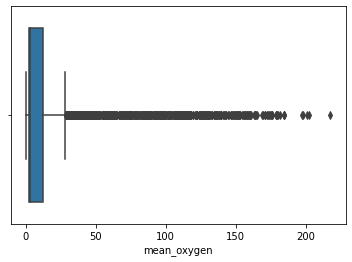

In [78]:
sns.boxplot(data = medical_data, x = "mean_oxygen")

<AxesSubplot:xlabel='kurtosis_glucose'>

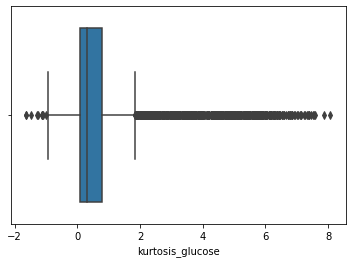

In [69]:
sns.boxplot(data = medical_data, x = "kurtosis_glucose")

<AxesSubplot:xlabel='kurtosis_oxygen'>

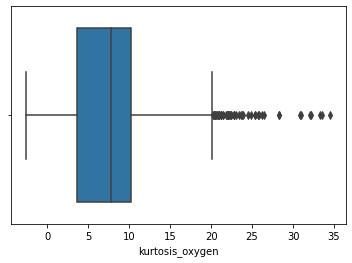

In [70]:
sns.boxplot(data = medical_data, x = "kurtosis_oxygen")

<AxesSubplot:xlabel='skewness_glucose'>

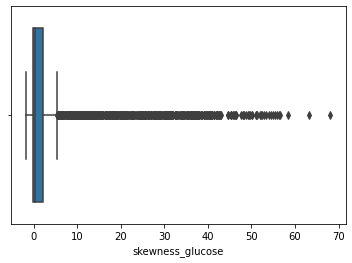

In [71]:
sns.boxplot(data = medical_data, x = "skewness_glucose")

<AxesSubplot:xlabel='skewness_oxygen'>

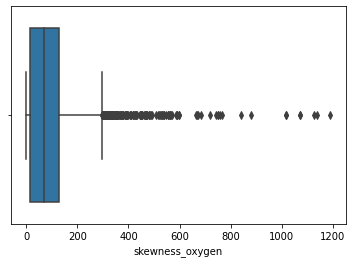

In [72]:
sns.boxplot(data = medical_data, x = "skewness_oxygen")

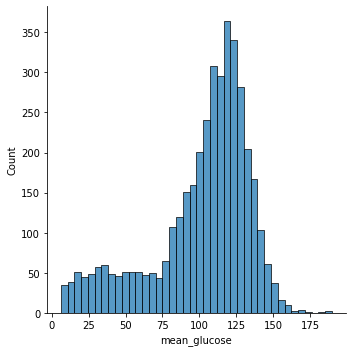

In [79]:
sns.displot(data = medical_data, x = "mean_glucose")

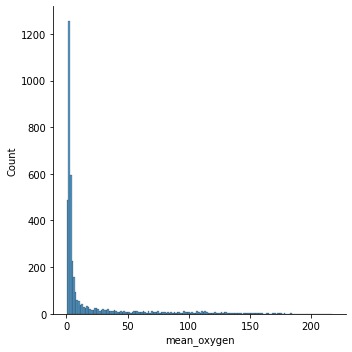

In [80]:
sns.displot(data = medical_data, x = "mean_oxygen")

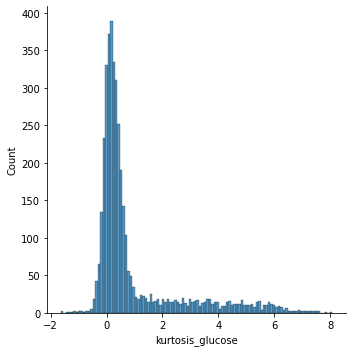

In [81]:
sns.displot(data = medical_data, x = "kurtosis_glucose")

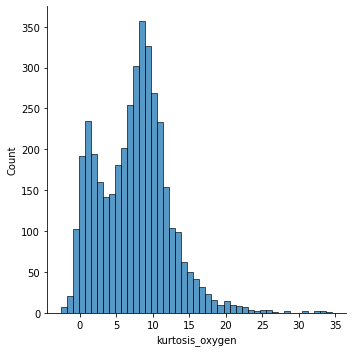

In [82]:
sns.displot(data = medical_data, x = "kurtosis_oxygen")

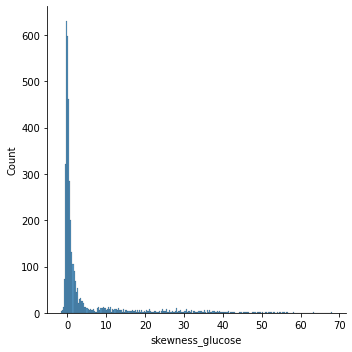

In [83]:
sns.displot(data = medical_data, x = "skewness_glucose")

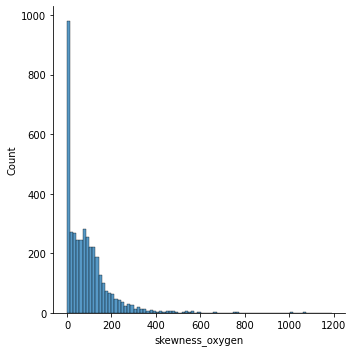

In [84]:
sns.displot(data = medical_data, x = "skewness_oxygen")

## Základný opis dát a ich charakteristika

Súbor personal_train.cvs
- 3933 záznamov
- 6 stĺpcov:
    - Unnamed: 0 (číslo riadku) - integer
    - name (meno) - object/string
    - address (adresa) - object/string
    - age (vek) - integer
    - sex (pohlavie) - object/string
    - date_of_birth (dátum narodenia) - object/string

Súbor other_train.cvs
- 3983 záznamov
- 22 stĺpcov:
    - Unnamed: 0 (číslo riadku) - integer
    - name (meno) - object/string
    - address (adresa) - object/string
    - kurtosis_oxygen (koeficient špicatosti pre hladinu kyslíka v krvi) - float
    - pregnant (tehotný) - object/string
    - education-num - float
    - relationship - object/string
    - skewness_glucose (koeficient asymetrie pre hladinu cukru v krvi) - float
    - mean_glucose (priemerná hladina cukru v krvi) - float
    - std_oxygen (štandardná odchýlka pre hladinu kyslíka v krvi) - float
    - capital-gain - float
    - skewness_oxygen (koeficient asymetrie pre hladinu kyslíka v krvi) - float
    - kurtosis_glucose (koeficient špicatosti pre hladinu cukru v krvi) - float
    - personal_info (osobné údaje) - object/string
    - education (dosiahnuté vzdelanie) - object/string
    - fnlwgt - float
    - class (prítomnosť ochorenia) - float
    - std_glucose (štandardná odchýlka pre hladinu cukru v krvi) - float
    - income (ročný príjem) - object/string
    - mean_oxygen (priemerná hladina kyslíka v krvi) - float
    - hours-per-week - float
    - capital-loss - float

štatistické údaje pre priemernú hladinu cukru v krvi:
- priemer = 101.295
- medián = 110.664
- smerodajná odchýlka = 33.546
- variancia = 1125.050
- minimum = 6.187
- maximum = 189.734

štatistické údaje pre koeficient špicatosti pre hladinu cukru v krvi:
- priemer = 0.949
- medián = 0.310
- smerodajná odchýlka = 1.608
- variancia = 2.587
- minimum = -1.641
- maximum = 8.069

štatistické údaje pre koeficient asymetrie pre hladinu cukru v krvi:
- priemer = 4.199
- medián = 0.371
- smerodajná odchýlka = 9.663
- variancia = 93.354
- minimum = -1.755
- maximum = 68.101

štatistické údaje pre priemernú hladinu kyslíka v krvi
- priemer = 18.421
- medián = 3.237
- smerodajná odchýlka = 34.713
- variancia = 1204.689
- minimum = 0.213
- maximum = 217.371

štatistické údaje pre koeficient špicatosti pre hladinu kyslíka v krvi:
- priemer = 7.416
- medián = 7.780
- smerodajná odchýlka = 4.803
- variancia = 23.071
- minimum = -2.597
- maximum = 34.539

štatistické údaje pre koeficient asymetrie pre hladinu kyslíka v krvi:
- priemer = 91.371
- medián = 68.629
- smerodajná odchýlka = 108.339
- variancia = 11734.453
- minimum = -1.976
- maximum = 1191.000

## Identifikácia problémov v dátach

V momentálnom stave dáta nie sú vhodné na ďalšie spracovanie, vyskytujú sa v nich problémy, ktoré nám v tom bránia.
V tejto časti dané problémy identifikujeme a navrhneme ich riešenie.

Duplicitné záznamy sa nevyskytujú ani v jednom dátovom sete, každý záznam je určený pre jedného špecifického človeka.
Dáta sú v oboch setoch v tabuľkovej podobe a mená stĺpcov sú až na dve výnimky dostatočne opisujúce. Stĺpec "fnlwgt"
by nemal byť pomenovaný v skratkovej podobe, keďže všetky ostatné stĺpce majú neskratkové pomenovanie. Bolo by vhodné
premenovať ho na "final_weight". Stĺpec "class" bude taktiež nutné premenovať, z dôvodu, že je to rezervovaný keyword
v Pythone. Tiež by bolo vhodné zmeniť jeho dátový typ z float na bool, keďže v ňom nastávajú len hodnoty 1 a 0.

Oba sety obsahujú stĺpec "Unnamed: 0", ktorý symbolizuje poradie riadkov v tabuľke. Na čísla riadkov nie je nutné
mať špecifický stĺpec, túto možnosť poskytuje knižnica pandas automaticky. V prípade, že by došlo k zmene poradia
záznamov, bolo by taktiež nutné meniť hodnoty v tomto stĺpci, čo je vlastne zbytočné, lebo pandas vypíše poradové
číslo správne, aj bez nášho zásahu. Z každého setu môžeme teda celý stĺpec "Unnamed: 0" odstrániť.

Hodnoty v stĺpci "education-num" odkazujú na hodnoty v stĺpci "education", čiže celý stĺpec "education-num" nám podáva
rovnakú informáciu ako stĺpec "education". Z tohto dôvodu ho môžeme z dátového setu odstrániť. Ak by sme toto nechceli
spraviť, tak je nutné niektoré hodnoty upraviť, pretože sú chybné a majú pripísané nuly navyše. Unikátných hodnôt v
"education" je 16, takže stĺpec "education-num" by ich mal obsahovať rovnako.

Taktiež pri stĺpcoch, ktoré majú len celočíselné hodnoty (capital-gain, fnlwgt, hours-per-week, capital-loss)
by bolo vhodné zmeniť dátový typ z float na integer.

In [54]:
medical_data.pregnant.unique()

array(['f', 'FALSE', 'F', 'TRUE', 'T', 't', nan], dtype=object)

Na určenie tehotenstva je použitých zbytočne veľa hodnôt ('f', 'FALSE', 'F', 'TRUE', 'T', 't', nan), ktoré symbolizujú
len dva stavy (nerátajúc 'NaN' hodnoty, ktoré sú prázdne). Bude nutné niektoré z nich premenovať, a používať len znaky
T a F (alebo 1 a 0), prípadne zmeniť dátový typ celého stĺpca na bool.

In [55]:
medical_data.isnull().sum()

Unnamed: 0            0
name                  0
address               0
kurtosis_oxygen       9
pregnant             12
education-num       404
relationship         22
skewness_glucose     18
mean_glucose         20
std_oxygen           16
capital-gain         14
skewness_oxygen       8
kurtosis_glucose     15
personal_info         9
education            12
fnlwgt               16
class                21
std_glucose          15
income               14
mean_oxygen          12
hours-per-week       13
capital-loss         13
dtype: int64

V súbore other_train.cvs sa vyskytujú záznamy, kde majú niektoré stĺpce chýbajúcu hodnotu reprezentovanú stavom NaN.
Ak sa nulová hodnota vyskytuje v dole uvedených stĺpcoch, nejde o príliš závažný problém, keďže tie stĺpce neobsahujú
pre nás dôležité informácie. Dané hodnoty môžeme nechať naďalej prázdne, keďže sa zväčša jedná o údaje, ktorých hodnotu
nevieme predpokladať, takže sa nedá doplniť. Ak pri ďalšej práci narazíme na záznam, kde bude v stĺpci, ktorý potrebuje
použiť, nulová hodnota, tak daný záznam jednoducho nezarátame.

Ďalšie z možných riešení je na miesto chýbajúcej hodnoty doplniť priemer, alebo medián. Toto je vhodné použiť v prípadoch,
kde hodnotu nevieme predpokladať. Samozrejme, dá sa to len pri číselných údajoch, ak sa jedná o dáta iného typu, je nutné
použiť najčastejšie vyskytujúcu sa hodnotu.

Stĺpce, kde môžeme nulovú hodnotu ignorovať:
- pregnant
- education-num
- relationship
- capital-gain
- personal_info
- education
- fnlwgt
- income
- hours-per-week
- capital-loss

V nasledujúcich stĺpcoch predstavuje chýbajúca hodnota vážnejší problém, keďže sa jedná o stĺpce, ktoré budú pre
nastávajúcu prácu podstatnejšie. V tomto prípade by bolo možné v niektorých prípadoch chýbajúce hodnoty doplniť.
Môžeme porovnať vybrané neprázdne stĺpce s neprázdnymi stĺpcami ostatných záznamov. Ak v inom zázname nájdeme podobné
hodnoty, dá sa predpokladať, že chýbajúca hodnota pôvodného záznamu, bude podobná tej v nájdenom. Samozrejme, táto
hodnota nebude 100% presná, preto je nutné brať ju s rezervou. Toto je možné len v prípadoch, keď k stĺpcu s chýbajucou
hodnotou, vieme priradiť stĺpec, ktorých hodnoty spolu súvisia.

Stĺpce, kde môžeme predpokladať hodnotu chýbajúcich údajov:
- kurtosis_oxygen
- skewness_glucose
- mean_glucose
- std_oxygen
- skewness_oxygen
- kurtosis_glucose
- class
- std_glucose
- mean_oxygen

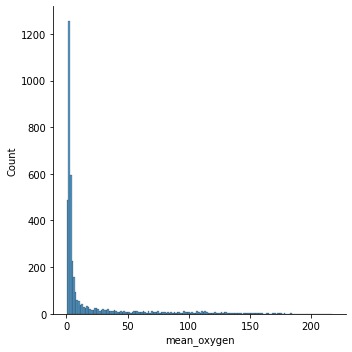

In [56]:
sns.displot(medical_data, x = "mean_oxygen")

Ako môžeme v hore uvedenom grafe vidieť, stĺpec "mean_oxygen" v niektorých záznamoch nadobúda výrazne vychýlené hodnoty.
Daný problém nemôžeme vyriešiť spôsobom, kde vychýleným hodnotám pripíšeme hodnotu priemeru, keďže extrémne vysoké (alebo
aj nízke) hodnoty výsledný priemer ovplyvňujú. V tomto prípade je vhodné použiť medián, ktorý takýmito hodnotami zväčša
ovplyvnený nebýva. Takto sa môžeme vysporiadať so všetkými záznamami, ktoré budú obsahovať výrazne vychýlené hodnoty.
Iným riešením by bolo vyrátať priemer všetkých záznamov, kde je ich hodnota v norme, a priradiť ho vychýleným hodnotám.
Na zistenie vychýlenej hodnoty nemusíme používať len grafy, funkcia describe() nám ukáže všetky dôležité štatistické
údaje. Ak je maximum/minimum výrazne väčšie ako horný/dolný kvartil, dá sa predpokladať, že niektoré hodnoty sú vychýlené.